In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
save_figs = True

In [3]:
import pandas  as pd
from cdcp.paths import DATA_DIR, ensure_dir
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib2 import Path
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
from functools import reduce

/tmp/ipykernel_203375/676478311.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

In [5]:
statistics_timestamp = '2021-10-23_23-02-31_846685'# datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%f")#
statistics_timestamp

'2021-10-23_23-02-31_846685'

In [6]:
birds = [
    ('B1597', '2021-05-14_12-40-20_423998', 'kilosort2_5'),
    ('B1188', '2021-05-31_18-52-29_558216', 'kilosort2_5'),
    ('B1595', '2021-07-10_16-42-47_090257', 'kilosort2'),
    ('B1276', '2021-07-14_11-14-02_257025', 'kilosort2'),
    ('B1426', '2021-07-14_11-29-39_657273', 'kilosort2'),
    ('B1432', '2021-06-01_15-14-38_561892', 'kilosort2_5'),
    ('B1170', '2021-06-01_21-01-26_519005', 'kilosort2_5'),
    ('B1244', '2021-07-14_12-57-45_546674', 'kilosort2'),
    ('B1593', '2021-06-28_18-13-24_826008', 'kilosort2_5'),
    ('B1248', '2021-07-03_18-08-01_063431', 'kilosort2_5'),
    # acute
    #('B1279', '2021-04-12_16-27-07_289527', 'kilosort2_5'),
    #('B1500', '2021-08-27_09-24-48_680961', 'kilosort2_5'),
    #('B1239', '2021-05-17_22-18-51_557635', 'kilosort2'),
    #('B1459', '2021-08-26_21-21-12_755614', 'kilosort2_5'),
]
birds_df = pd.DataFrame(birds, columns = ['bird', 'timestamp', 'sorter']).set_index('bird')

In [7]:
identifiers = ['spike_count',  "nm_by_interpolation_16_25", "unit_location"]# , 

In [8]:
all_unit_statistics_df= []
for bird, timestamp, sorter in tqdm(birds, desc='birds'):
    
    unit_statistics_df_list = []
    for identifier in identifiers:
        unit_statistics_df = pd.read_pickle(
        DATA_DIR
        / "unit_statistics"
        / statistics_timestamp
        / identifier
        / "{}.pickle".format(bird)
    )
        unit_statistics_df_list.append(unit_statistics_df)
        
    print(bird, 'nrows per', [len(i) for i in unit_statistics_df_list])
    
    # combine dfs
    unit_statistics_df = reduce(lambda x, y: pd.merge(x, y, on = 'unit', how='outer'), unit_statistics_df_list)
    unit_statistics_df['bird'] = bird
    
    all_unit_statistics_df.append(unit_statistics_df)
unit_statistics_df = pd.concat(all_unit_statistics_df)

birds:   0%|          | 0/10 [00:00<?, ?it/s]

B1597 nrows per [6750, 6750, 8711]
B1188 nrows per [510, 510, 821]
B1595 nrows per [242, 242, 325]
B1276 nrows per [46, 46, 57]
B1426 nrows per [93, 93, 180]
B1432 nrows per [2157, 2157, 2364]
B1170 nrows per [1281, 1281, 1693]
B1244 nrows per [141, 141, 150]
B1593 nrows per [7714, 7714, 13260]
B1248 nrows per [8698, 8698, 13184]


In [9]:
len(unit_statistics_df)

40745

In [10]:
# merge with categorical units
categorical_units_df = pd.read_pickle(DATA_DIR / 'categorical_unit_01_23_22.pickle')

In [11]:
len(categorical_units_df)

13854

In [12]:
#categorical_units_df= categorical_units_df[categorical_units_df.categorical_unit == True]
unit_statistics_df_cat = pd.merge(unit_statistics_df, categorical_units_df, on = ['bird', 'unit'])
# subset categorical units
unit_statistics_df = unit_statistics_df_cat
print(len(unit_statistics_df))

12228


In [13]:
unit_statistics_df[:3]

n_trials n_cued_trials n_incorrect_trials n_correct_trials n_reward_trials  \
0     1390          1143                151              975             387   
1     1273          1043                150              975             387   
2     1085           857                102              942             242   

  n_passive_trials n_active_trials n_spikes   unit  \
0                0            1390    24748   7569   
1                0            1273      350   7927   
2                0            1085     2022  11153   

                                   sm_correlation_AF  \
0  [[1.0, 0.62658125, 0.27568033, -0.36592004, 0....   
1  [[1.0, -0.15829341, nan, nan, nan, 0.46024048,...   
2  [[1.0, -0.19670367, 0.20090954, -0.27146456, 0...   

                                               rv_AF  \
0  [[0.04028173, 0.062278096, 0.09168189, 0.12727...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[1.3598142e-05, 5.5955064e-05, 0.00018950122,...   

                                              ips_AF nm_min_correlation_AF  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...              0.365514   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...               0.04813   
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...             -0.186315   

  nm_max_correlation_AF nm_r2_correlation_AF nm_inflection_correlation_AF  \
0              0.525795             0.077625                     9.038676   
1                   2.0             0.040262                     8.201521   
2              0.714655             0.322168                     6.217558   

  nm_slope_correlation_AF nm_range_correlation_AF  \
0               99.987875                0.160282   
1                   100.0                 1.95187   
2                9.465524                 0.90097   

  nm_scaled_slope_correlation_AF  \
0                     623.824753   
1                      51.232927   
2                      10.505924   

                                        sm_cosine_AF nm_min_cosine_AF  \
0  [[1.0, 0.85966784, 0.7327576, 0.5446094, 0.872...         0.492633   
1  [[1.0, 0.00014704473, 0.0, 0.0, 0.0, 0.5245082...         0.362293   
2  [[1.0, 0.46968177, 0.7008212, 0.5847663, 0.527...         0.437604   

  nm_max_cosine_AF nm_r2_cosine_AF nm_inflection_cosine_AF nm_slope_cosine_AF  \
0         0.514815        0.638532                9.377057          54.117385   
1         0.881969        0.856642                  8.1357              100.0   
2         0.628173        0.473127                    13.0            2.20959   

  nm_range_cosine_AF nm_scaled_slope_cosine_AF  \
0           0.022182               2439.686442   
1           0.519676                192.427488   
2           0.190569                 11.594712   

                                     sm_euclidean_AF nm_min_euclidean_AF  \
0  [[1.0, 0.17098862, 0.14764337, 0.09976049, 0.1...            0.398442   
1  [[1.0, 0.6736446, 0.7777778, 0.7777778, 0.7777...            0.476106   
2  [[1.0, 0.5155432, 0.67088544, 0.55348516, 0.48...            0.452068   

  nm_max_euclidean_AF nm_r2_euclidean_AF nm_inflection_euclidean_AF  \
0            0.611409           0.957086                   7.768797   
1            0.498833           0.474368                    8.10293   
2            0.524991           0.780039                   7.640377   

  nm_slope_euclidean_AF nm_range_euclidean_AF nm_scaled_slope_euclidean_AF  \
0                 100.0              0.212967                    469.55597   
1              9.641347              0.022727                   424.216046   
2                 100.0              0.072922                  1371.323697   

                                     sm_manhattan_AF nm_min_manhattan_AF  \
0  [[1.0, 0.613873, 0.5549224, 0.48701784, 0.6305...            0.486829   
1  [[1.0, 0.9158785, 0.9364467, 0.9364467, 0.9364...            0.493034   
2  [[1.0, 0.8922749, 0.94248813, 0.91341615, 0.87...            0.490661   

  nm_ma

### Nuclei

In [14]:
for nuclei in unit_statistics_df.estimated_nuclei.unique():
    nuclei_units =  unit_statistics_df[
            unit_statistics_df.estimated_nuclei == nuclei
        ]
    n_cat = np.sum(
       nuclei_units.categorical_unit.values
        == True
    )
    print(nuclei, n_cat, round(100 *n_cat / len(nuclei_units),1))

Field_L 1790 62.1
NCL 2549 56.3
CMM 1694 55.1
NCM 721 41.3


  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

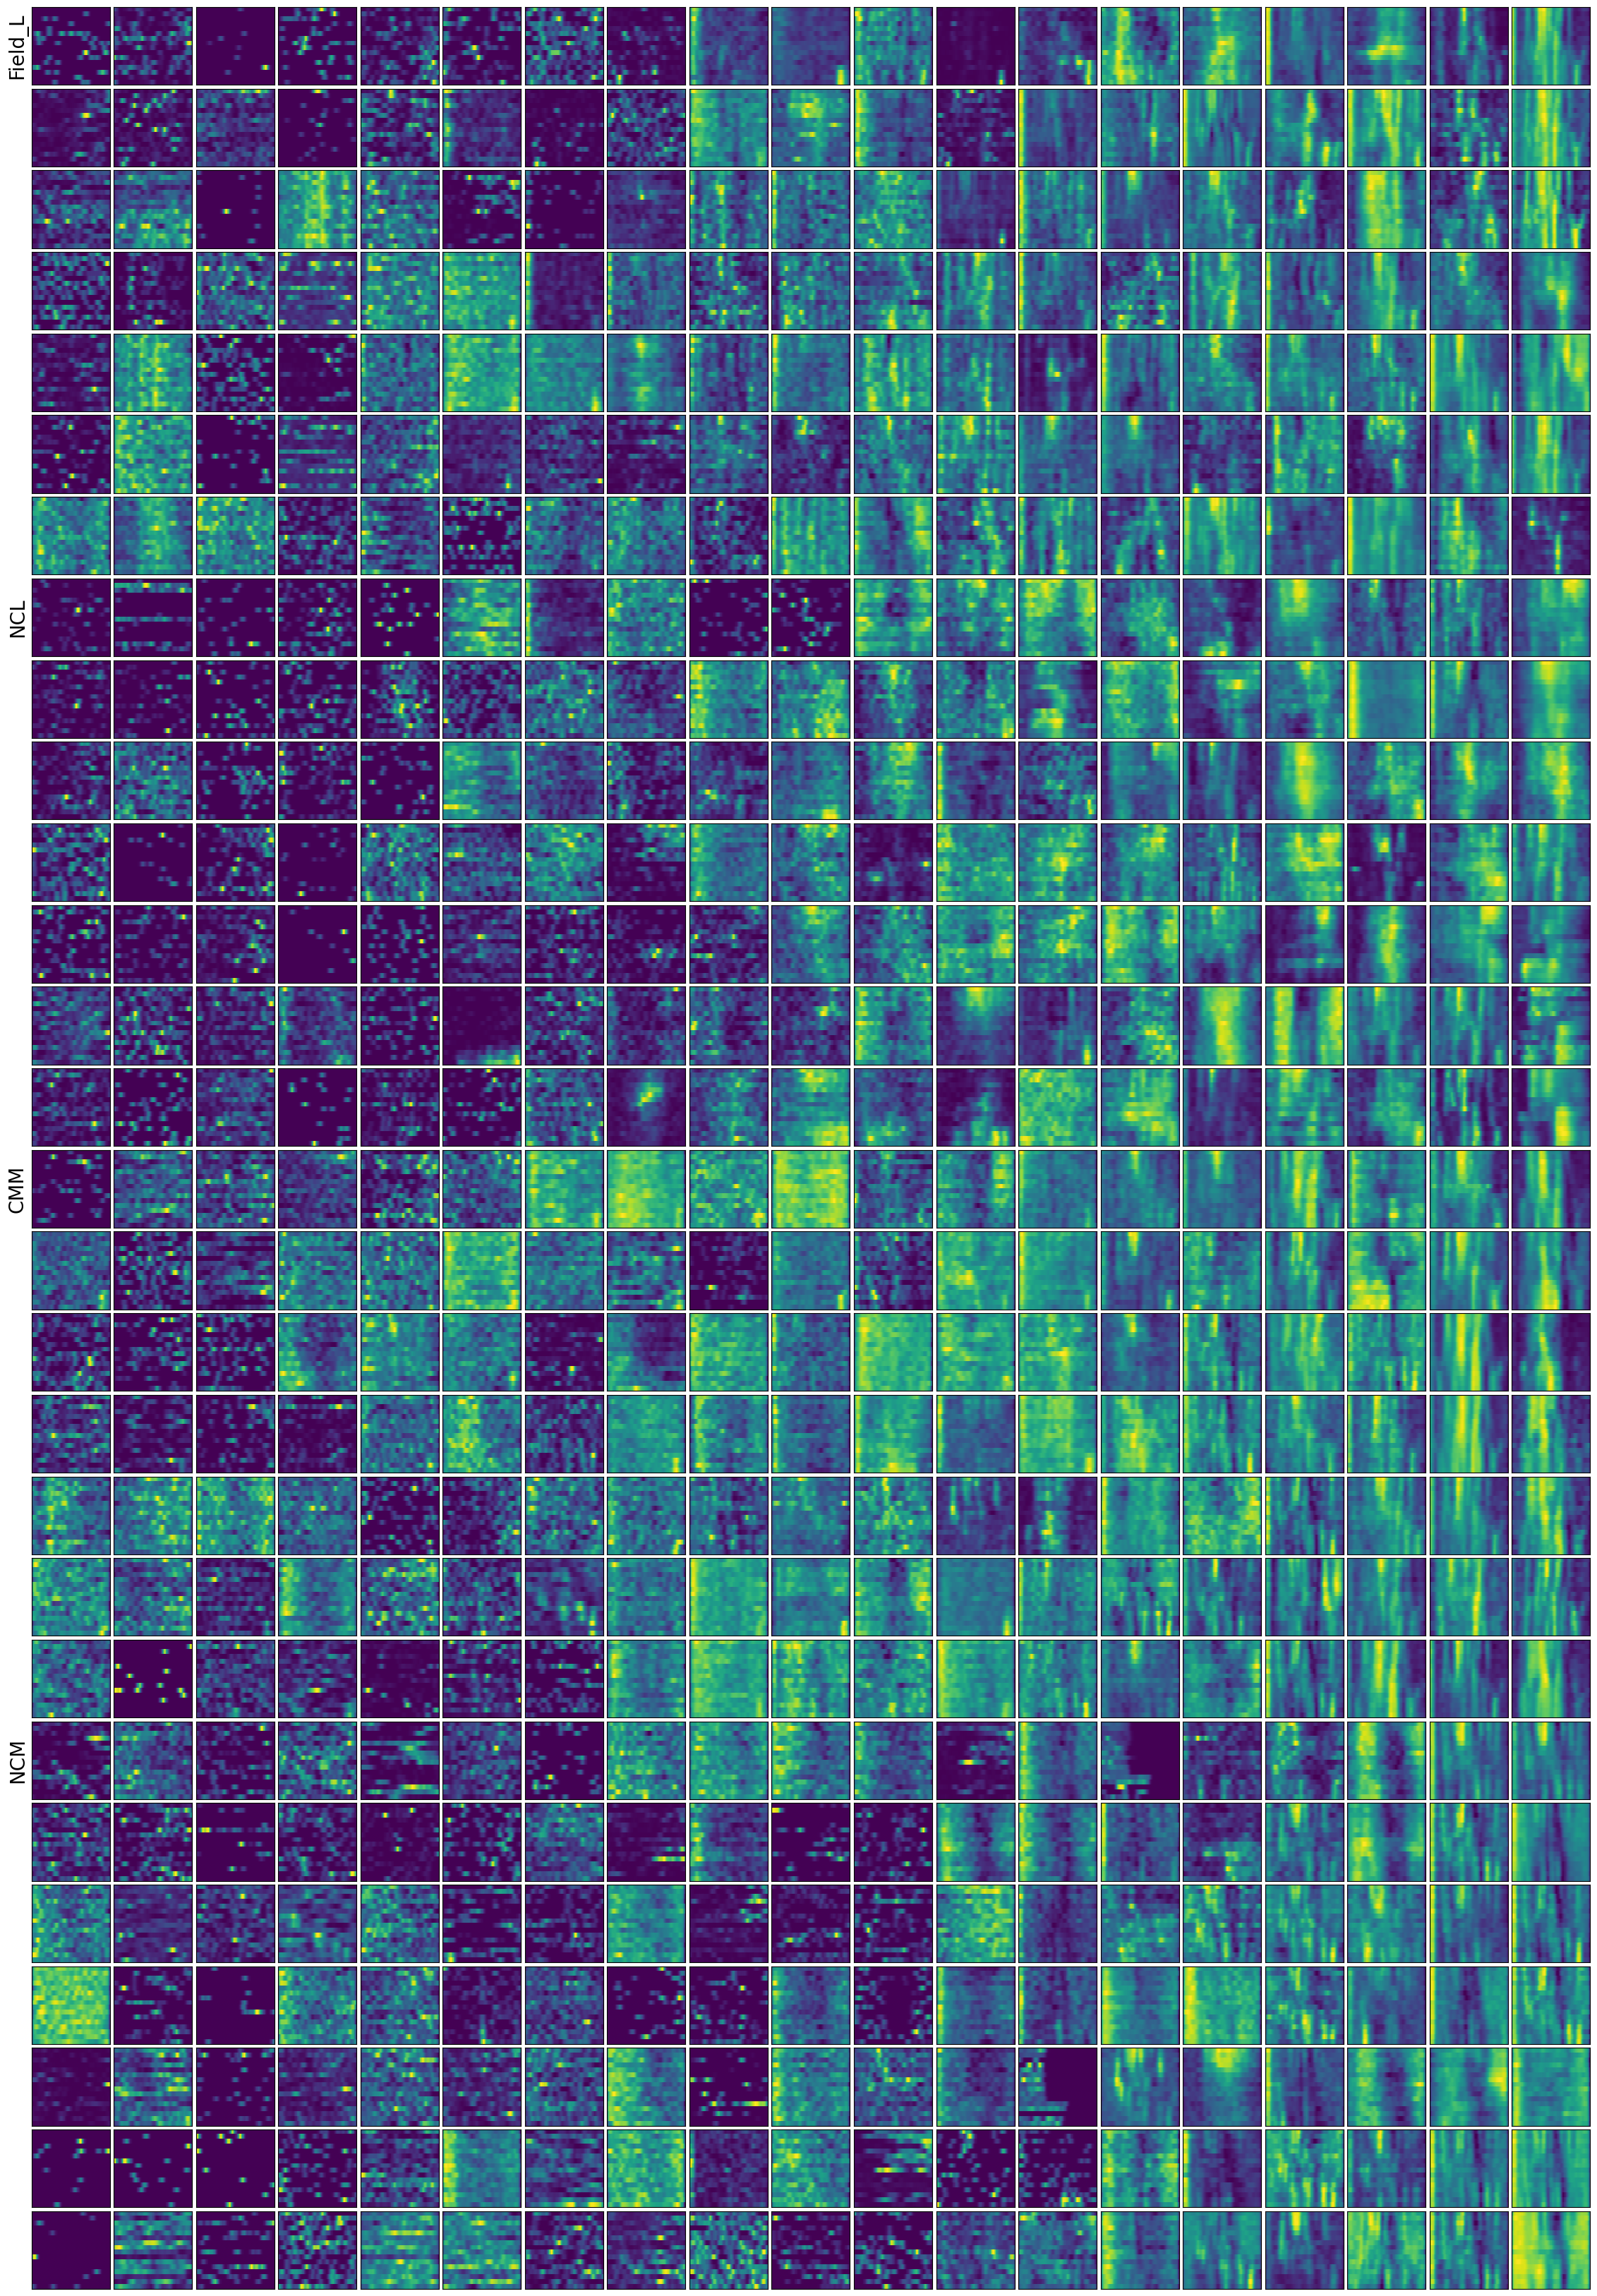

In [15]:
nuclei = unit_statistics_df.estimated_nuclei.unique()
n_birds = len(nuclei)

rows_per_bird = 7
nrows = rows_per_bird * n_birds
ncols = 19
zoom = 1.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * zoom, nrows * zoom),
    gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

axi = 0
birdi = 0
for nuclei in unit_statistics_df.estimated_nuclei.unique():
    nuclei_units =  unit_statistics_df[
            unit_statistics_df.estimated_nuclei == nuclei
        ]    #print(bi,birdi,  bird)
    axs.flatten()[axi].set_ylabel(nuclei, fontsize=20)
    
    axs_subset = axs[(birdi*rows_per_bird):((birdi+1) * rows_per_bird), :].T.flatten()
    
    bird_units = unit_statistics_df[unit_statistics_df.estimated_nuclei == nuclei]

    sort_param = "categoricality"
    sorted_unit_statistics_df = bird_units.sort_values(by=sort_param)

    for i, ix in enumerate(
        tqdm(
            np.linspace(
                0, len(sorted_unit_statistics_df) - 1, rows_per_bird * ncols
            ).astype(int)
        )
    ):
        row = sorted_unit_statistics_df.iloc[ix]
        rv = row.rv_ALL
        rv = np.nan_to_num(rv)
        if np.any(np.isnan(rv)):
            raise ValueError
        rv = np.log(rv + 1e-1)
        ax = axs_subset.flatten()[i]
        axi += 1
        try:
            ax.matshow(rv, aspect="auto")
        except:
            0
        # ax.axis("off")
        ax.set_xticks([], [])
        ax.set_yticks([], [])
    #break
    birdi += 1
    
    
ensure_dir(FIGURE_DIR / 'categoricality')
if save_figs:
    save_fig(FIGURE_DIR / 'categoricality' / 'example_units_by_categoricality_region', save_pdf=True)
plt.show()
    

### Birds

In [20]:
for bird in unit_statistics_df.bird.unique():
    bird_units =  unit_statistics_df[
            unit_statistics_df.bird == bird
        ]
    n_cat = np.sum(
       bird_units.categorical_unit.values
        == True
    )
    print(bird, n_cat, round(100 *n_cat / len(bird_units),1))

B1597 1763 54.5
B1188 214 56.2
B1595 45 72.6
B1276 34 89.5
B1426 65 89.0
B1432 968 79.0
B1170 467 55.9
B1244 123 92.5
B1593 2054 51.9
B1248 1021 44.7


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

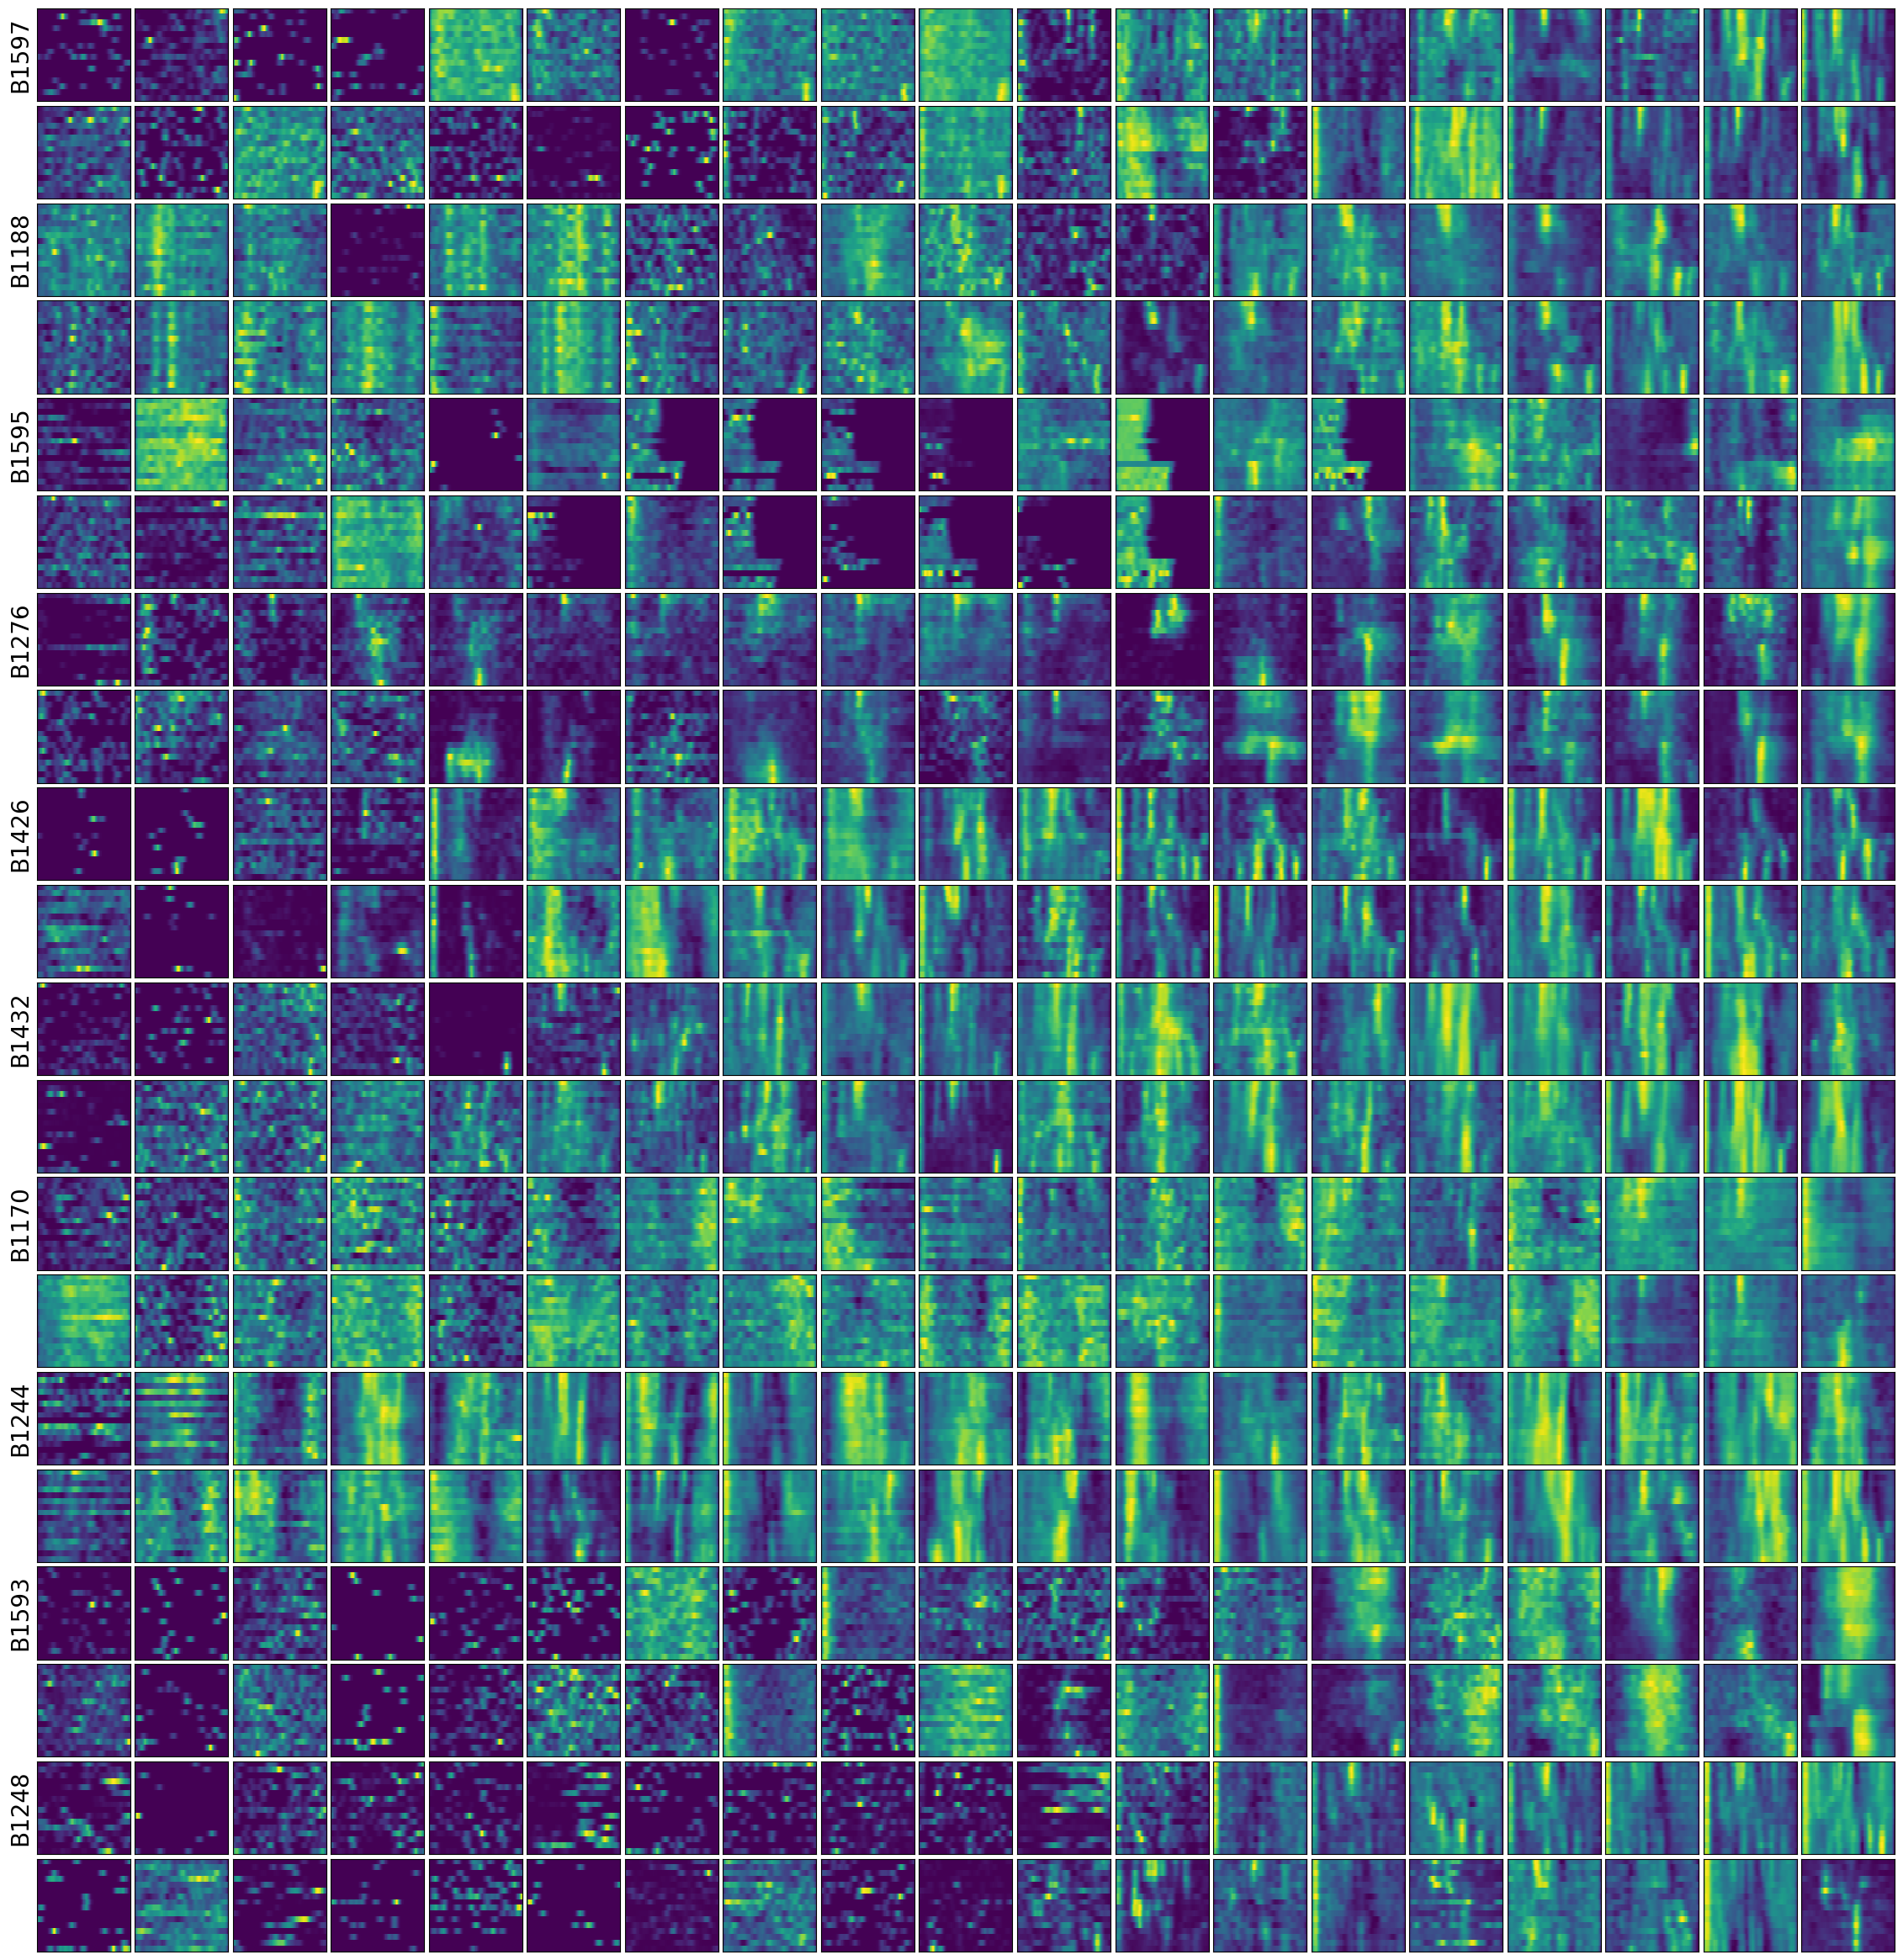

In [21]:
birds = unit_statistics_df.bird.unique()
n_birds = len(birds)

rows_per_bird = 2
nrows = rows_per_bird * n_birds
ncols = 19
zoom = 1.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * zoom, nrows * zoom),
    gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

axi = 0
birdi = 0
for bi, bird in enumerate(birds):
    #print(bi,birdi,  bird)
    axs.flatten()[axi].set_ylabel(bird, fontsize=20)
    
    axs_subset = axs[(birdi*rows_per_bird):((birdi+1) * rows_per_bird), :].T.flatten()
    
    bird_units = unit_statistics_df[unit_statistics_df.bird == bird]

    sort_param = "categoricality"
    sorted_unit_statistics_df = bird_units.sort_values(by=sort_param)

    for i, ix in enumerate(
        tqdm(
            np.linspace(
                0, len(sorted_unit_statistics_df) - 1, rows_per_bird * ncols
            ).astype(int)
        )
    ):
        if bird == 'B1426': # skip nan
            if i == 2:
                ix+=1
        row = sorted_unit_statistics_df.iloc[ix]
        rv = row.rv_ALL
        rv = np.nan_to_num(rv)

        if np.any(np.isnan(rv)):
            raise ValueError
        rv = np.log(rv + 1e-1)
        ax = axs_subset.flatten()[i]
        axi += 1
        try:
            ax.matshow(rv, aspect="auto")
        except:
            0
        # ax.axis("off")
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        
    #break
    birdi += 1
    
ensure_dir(FIGURE_DIR / 'categoricality')
if save_figs:
    save_fig(FIGURE_DIR / 'categoricality' / 'example_units_by_categoricality_bird', save_pdf=True)
plt.show()

### Morph

In [22]:
L_STIMS = ['A', 'B', 'C']
R_STIMS = ['E', 'F', 'G']

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

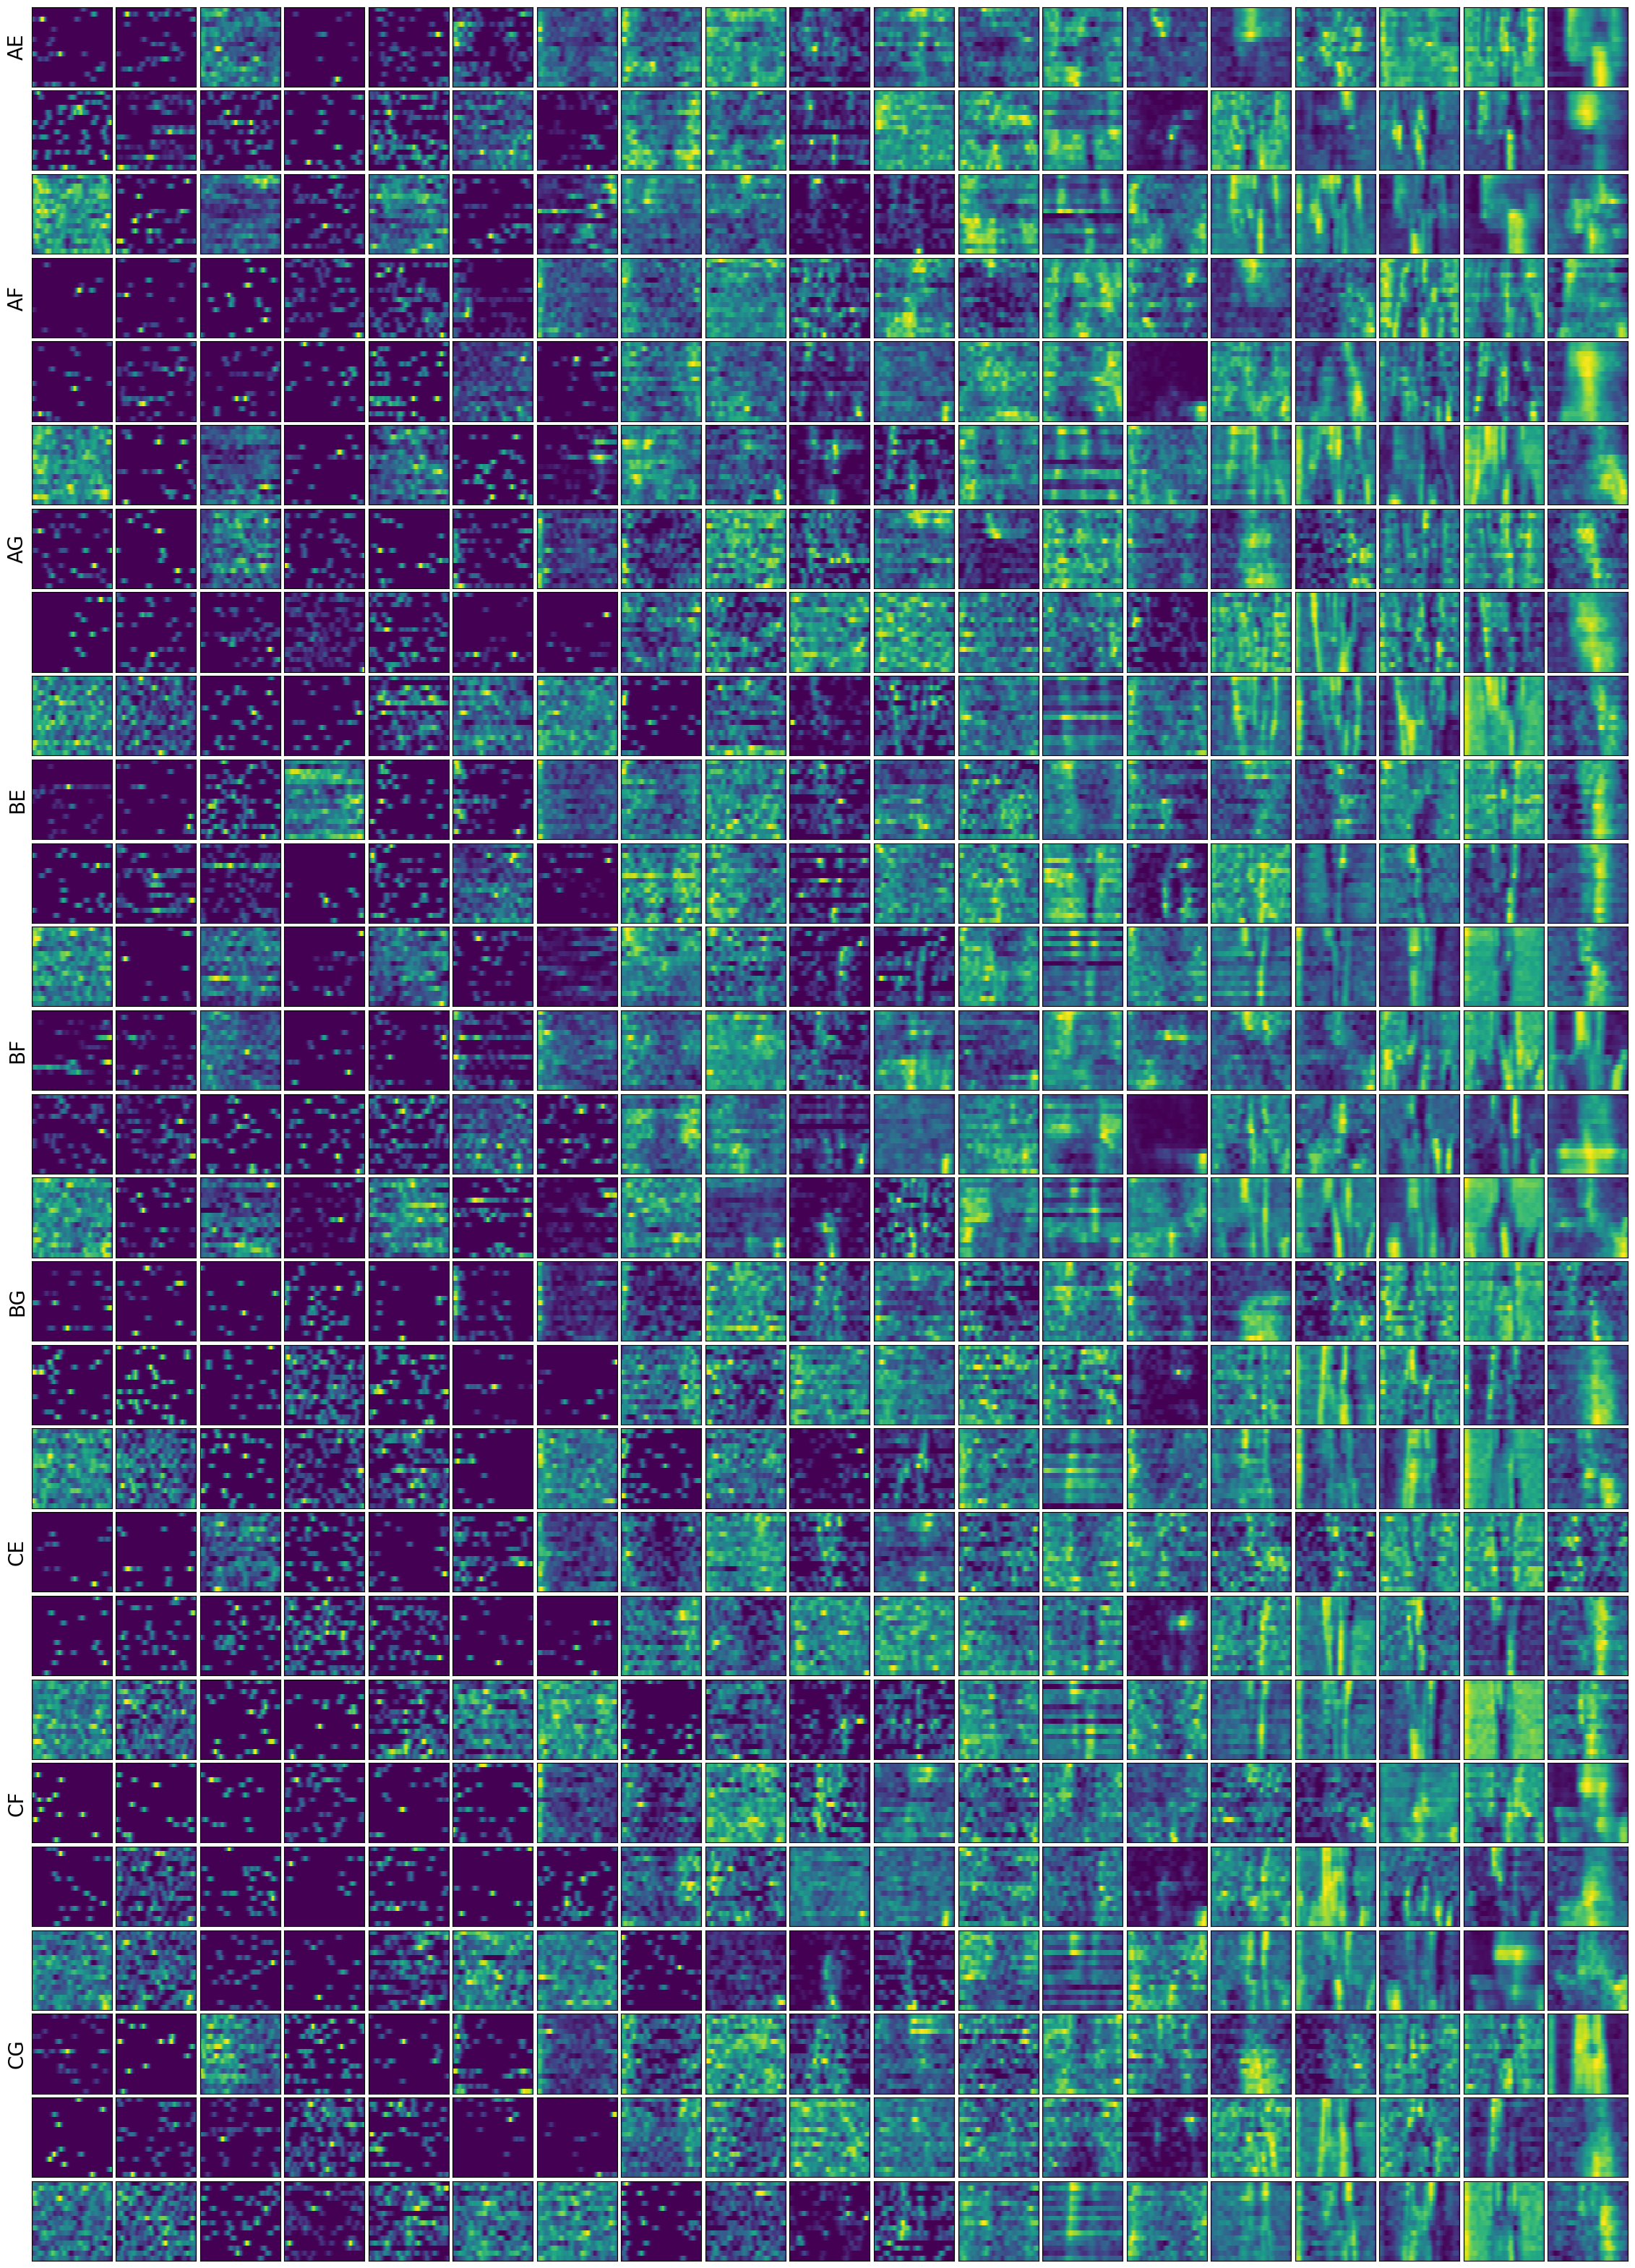

In [23]:
n_birds = len(L_STIMS)* len(R_STIMS)

rows_per_bird = 3
nrows = rows_per_bird * n_birds
ncols = 19
zoom = 1.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * zoom, nrows * zoom),
    gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

axi = 0
birdi = 0

for ls in L_STIMS:
    for rs in R_STIMS:
        sort_param = "categoricality"
        #print(ls, rs)
        mask = (unit_statistics_df.n_active_trials.values + unit_statistics_df.n_passive_trials.values ) > 1000
        sorted_unit_statistics_df = unit_statistics_df[mask].sort_values(by=sort_param)
        
        axs_subset = axs[(birdi*rows_per_bird):((birdi+1) * rows_per_bird), :].T.flatten()
        
        axs_subset[0].set_ylabel(f"{ls}{rs}", fontsize=20)

        for i, ix in enumerate(tqdm(np.linspace(0, len(sorted_unit_statistics_df)-1, rows_per_bird*ncols).astype(int))):
            if ix > (len(sorted_unit_statistics_df)-100):
                ix -= 100
            for _ in range(100):
                row = sorted_unit_statistics_df.iloc[ix]
                rv = row[f"rv_{ls}{rs}"]
                rv = np.log(rv+1e-1)
                if np.any(np.isnan(rv)):
                    ix+=1
                    continue
                ax = axs_subset.T.flatten()[i]
                try:
                    ax.matshow(rv, aspect="auto")
                except:
                    0
                ax.set_xticks([], [])
                ax.set_yticks([], [])
                break
        birdi+=1
        
ensure_dir(FIGURE_DIR / 'categoricality')
if save_figs:
    save_fig(FIGURE_DIR / 'categoricality' / 'example_units_by_categoricality_morph', save_pdf=True)
plt.show()